<a href="https://colab.research.google.com/github/Eudson7/Python-Projets/blob/main/My_First_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial**
### **Geospatial Analysis with Geopandas**

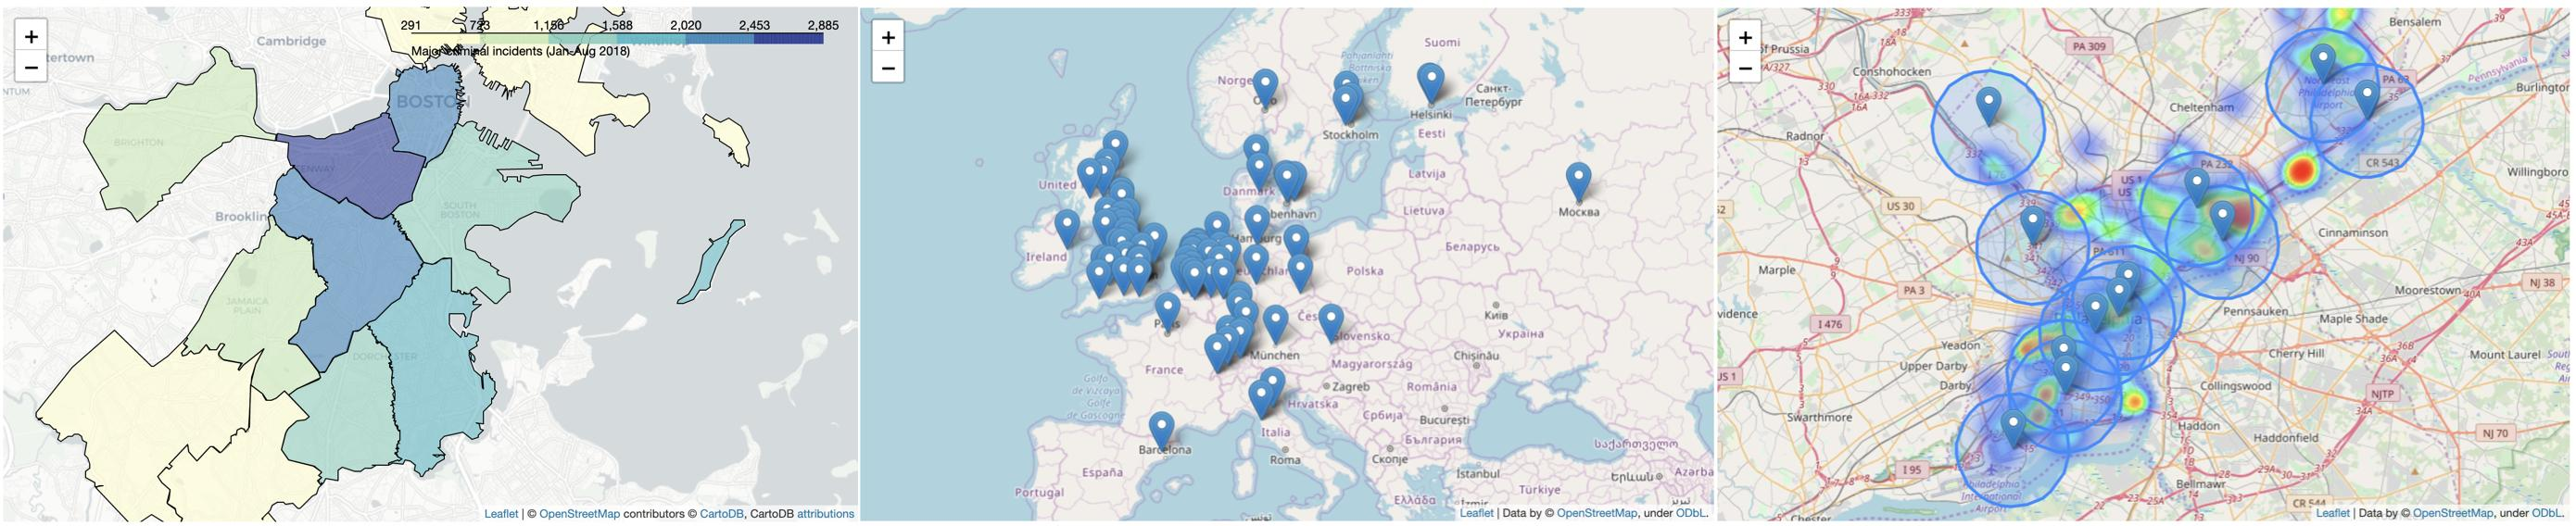

# **Introdução**

Neste micro-curso, você aprenderá sobre diferentes métodos para discutir e visualizar dados geoespaciais ou dados com uma localização geográfica.
Ao longo do caminho, você oferecerá soluções para vários problemas do mundo real, como:

* Quais áreas de uma cidade tem maior número de clientes ligados a rede elétrica?
* Quais os locais de praias com maior incidência de ataque tubarões e determinar os locais seguros para banhistas? 
* Quais praias estão havendo trabalhos áreas de preservação e os locias impróprios para banhistas?
* Quais áreas poderiam ser beneficiadas com reforço extra contra terremotos?
* Quais locais de deternimado municipios estão expandindo no ramo imobiliário para projetar abertura de novos estabelecimentos comerciais?
* Uma determinada capital tem hospitais suficientes para atuar no atendimento a colisões de veículos motorizados?
* Quais áreas da cidade apresentam maior incidência de crime para definição de rota de viaturas da polícia?

Existem muitos formatos de arquivo geoespaciais diferentes, como shapefile, GeoJSON, KML e GPKG.

Shapefile é o tipo de arquivo mais comum que você encontrará, e
todos esses tipos de arquivo podem ser carregados rapidamente com a função **read_file ()** da biblioteca GeoPandas.

### Download do shape file
Faça o donwlod do shape file (cnfp2018_final) de florestas do estado Algoas para um local no seu computador.

[*Home / Cadastro Nacional de Florestas Públicas / Informações Florestais / Cadastro Nacional de Florestas Públicas - CNFP / Dados por estado - CNFP 2018*](https://www.florestal.gov.br/cadastro-nacional-de-florestas-publicas/127-informacoes-florestais/cadastro-nacional-de-florestas-publicas-cnfp/1673-dados-por-estado-cnfp-2018)



### Upload do shape file
Faça o upload dos arquivos "cnfp2018_final" para esta sessão do colab. (caso você ainda não saiba, veja a maneira mais simples na opçãp 3 do site: https://nymarya.github.io/5-modos-de-carregar-arquivos-no-google-colab/)

### Instalar e importar bibliotecas necessárias
O primeiro passo é ler alguns dados geoespaciais! Para fazer isso, usaremos a biblioteca GeoPandas.

In [ ]:
# instalar biblioteca geopandas
!pip install geopandas

In [ ]:
# importar biblioteca geopandas (geodataframe)
import geopandas as gpd

Instalamos e importamos a biblioteca geopandas, e tambem atribuimos um apelido. Agora o geopandas chama-se de "gpd". Daqui pra frente sempre que precisarmos chamar o geopandas usaremos apenas "gpd."

### Carregar arquivo no geodataframe
A próxima célula de código carrega o arquivo (shape file) contendo informações sobre florestas do Alagoas (CNFP 2018) para "df_al".

In [ ]:
# Leia os dados do arquivo shape file e crie o geodataframe "gdf_al".
gdf_al = gpd.read_file("/content/cnfp2018_final.shp")


Após garregar o geodataframe com dados do shapefile, vamos ver o conteúdo.

In [ ]:
# Visualize os cinco primeiros registros do dataframe
gdf_al.head()

Para visualizar as primeiras cinco linhas dos dados, usamos o método "head ()". Você deve se lembrar que isso também é o que usamos para visualizar um DataFrame do Pandas. Na verdade, cada comando que você pode usar com um DataFrame funcionará com os dados!

Isso ocorre porque os dados foram carregados em um objeto (GeoPandas) GeoDataFrame que tem todos os recursos de um DataFrame (Pandas).

Vamos conferir o tipo de dado usando o método "type". Que exibirá uma mensagem informando o tipo de dado: "*geopandas.geodataframe.GeoDataFrame*"

In [ ]:
# Verifique o tipo do dado
type(gdf_al)

### Preparando a análise
Por exemplo, se não planejamos usar todas as colunas, podemos selecionar um subconjunto delas. Apenas com os campos necessários para a análise.

In [ ]:
gdf_al_resumo = gdf_al.loc[:, ["nome", "bioma", "orgao", "geometry"]].copy()
gdf_al_resumo.head(10) # listamos os 10 registros do dataframe resumido que nomeamos de "data"

Usamos o método "value_counts()" para ver uma lista de diferentes tipos de terreno, junto com quantas vezes eles aparecem no conjunto de dados. 

In [ ]:
# Quantas florestas estão na responsabilidade do cada orgão?
gdf_al_resumo.orgao.value_counts()

Você também pode usar "loc" e "iloc" para selecionar subconjuntos de dados.

In [ ]:
# Selecione orgaos que se enquadram na categoria "FUNAI" ou "ICMBIO"
orgao_al = gdf_al_resumo.loc[gdf_al_resumo.orgao.isin(['FUNAI', 'ICMBIO'])].copy()
orgao_al.head()

In [ ]:
# Selecione biomas "MATA ATLANTICA" e "CAATINGA" existentes no alagoas 
bioma_al = gdf_al_resumo.loc[gdf_al_resumo.bioma.isin(['MATA ATLANTICA', 'CAATINGA'])].copy()
bioma_al.head()

Se você não está familiarizado com os comandos acima, recomendamos que marque esta página para referência, para que possa consultar os comandos conforme necessário. Usaremos esses comandos ao longo deste micro-curso para entender e filtrar os dados antes de criar mapas.

# **Crie seu primeiro mapa!**
### **Podemos visualizar rapidamente os dados com o método plot ().**

Página do Mapa Político-Administrativo do Estado do Alagoas [Link do Site](https://dados.al.gov.br/catalogo/dataset/mapa-politico-administrativo-do-estado-de-alagoas/resource/6b1799c7-a75a-466d-99bd-30225a2eb9ba)

ou faça dowload direto dos arquivos: https://dados.al.gov.br/catalogo/dataset/93386ee4-4e12-4d24-82ff-3c411d7b9685/resource/6b1799c7-a75a-466d-99bd-30225a2eb9ba/download/mapapoliticoadmal2019shp.rar

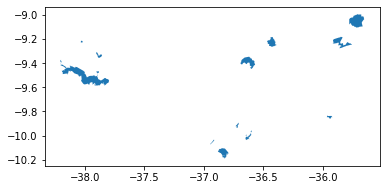

In [ ]:
bioma_al.plot()


Cada GeoDataFrame contém uma coluna especial de "geometria". Ele contém todos os objetos geométricos que são exibidos quando chamamos o método plot ().

In [ ]:
# Veja as cinco primeiras entradas na coluna "geometria"
bioma_al.geometry.head()

0    MULTIPOLYGON (((-36.73113 -9.92328, -36.73114 ...
1    POLYGON ((-38.03804 -9.50968, -38.03963 -9.510...
2    POLYGON ((-36.81101 -10.16438, -36.80961 -10.1...
3    POLYGON ((-35.70760 -8.99339, -35.70204 -8.997...
4    POLYGON ((-36.63390 -9.38384, -36.63567 -9.384...
Name: geometry, dtype: geometry

Embora esta coluna possa conter uma variedade de tipos de dados diferentes, cada entrada normalmente será um Point, LineString ou Polygon

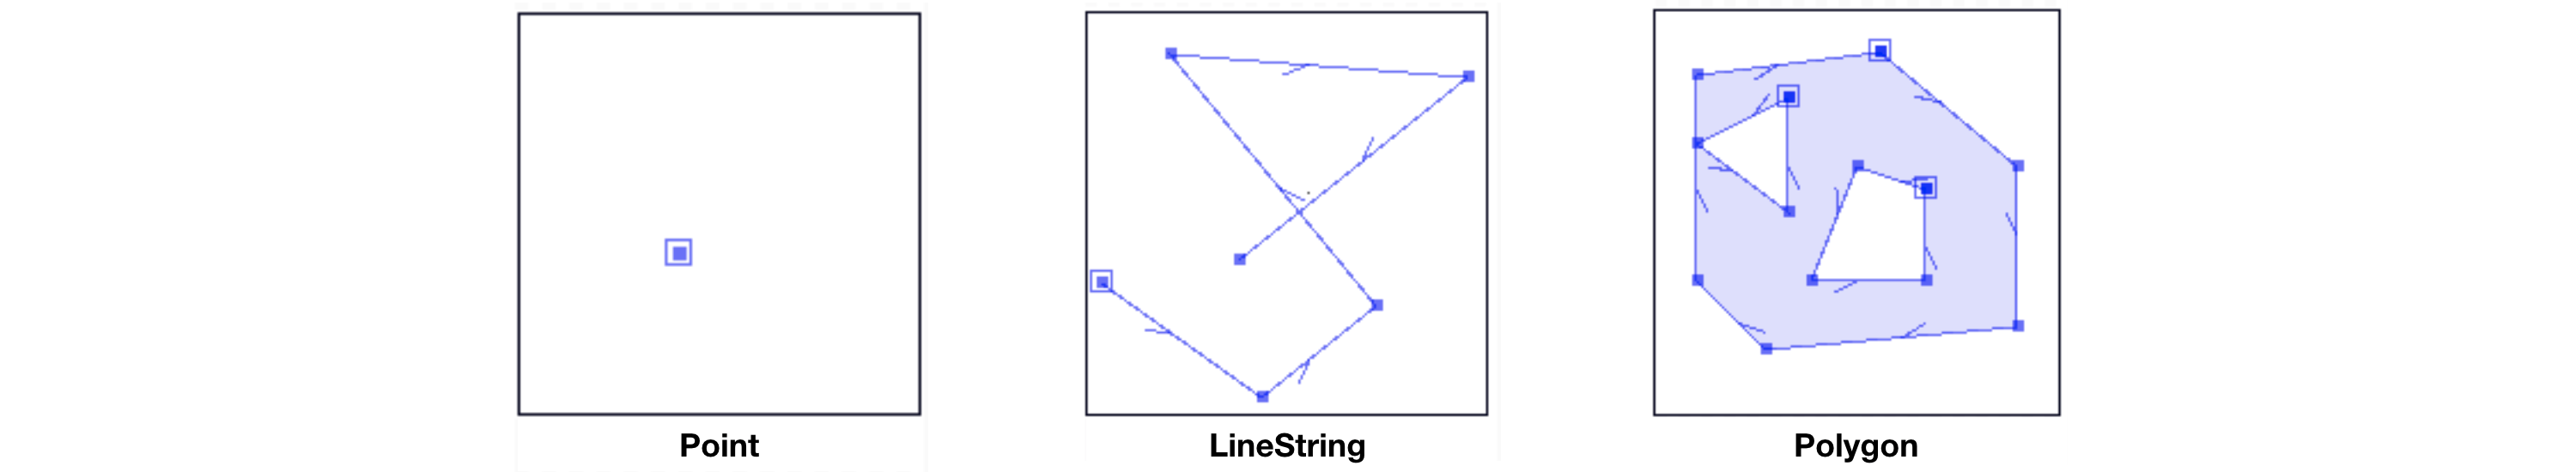

A coluna "geometria" em nosso conjunto de dados contém diversos objetos Polygon diferentes, cada um correspondendo a uma forma diferente no gráfico acima.

Na célula de código abaixo, criamos mais três GeoDataFrames (point, polygon e linestring).

In [ ]:
# Limites de todas os municipios do estado de alagoas (polígono)
municipio_al = gpd.read_file("/content/municipios IBGE 2018.shp")

In [ ]:
# Sede dos municípios do Alagoas (point)
sede_mun_al = gpd.read_file("/content/Sedes Municipais AL Semarh 2007.shp")

In [ ]:
# Rodovias estaduais de Alagoas (line)
rodovia_al = gpd.read_file("/content/Rodovias Embrapa 2013 SEPLAG 2019.shp")
rod_mun_al = rodovia_al.loc[rodovia_al.Categoria=='estadual'].copy() # filtro de rodovias estaduais

In [ ]:
# Comunidade quilombola no estado do Alagoas (polígono)
quilombola_al = gpd.read_file("/content/Comunidades Quilombolas AL SEPLAG 2019.shp")

Em seguida, criamos um mapa de 4 GeoDataFrames (limites municipais, sede municipais, rodovias estadual e biomas).

O método plot () assume como entrada (opcional) vários parâmetros que podem ser usados ​​para personalizar a aparência. Mais importante, definir um valor para "ax" garante que todas as informações sejam plotadas no mesmo mapa.

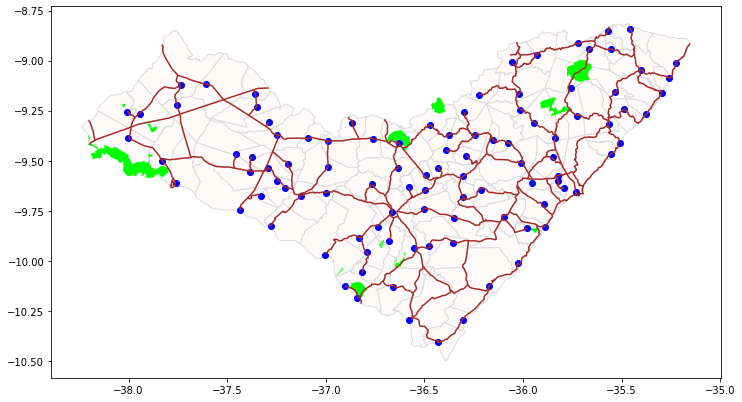

In [ ]:
# Defina um mapa básico com os limites municipais, das rodovias estaduais, sedes dos municipios e os biomas dos estado alagoas
ax = municipio_al.plot(figsize=(12,12), color='snow', edgecolor='gainsboro', zorder=0) 
# adicione rodovia, bioma, quilombo na base do mapa
rodovia_al.plot(color='brown', ax=ax)
bioma_al.plot(color='lime', markersize=1, ax=ax)
sede_mun_al.plot(color='blue', ax=ax)

Em seguida, criamos um mapa de 4 GeoDataFrames (limites municipais, sede municipais, rodovias estadual e biomas).

Agora vamos analisar o município de Arapiraca com suas comunidades quilombolas. Veja abaixo os filtros aplicados nos geodataframes.

In [ ]:
# comunidades quilombolas do estado do Alagoas
#quilombola_al.plot(color='blue', markersize=2, ax=ax)
# filtro para deixar apenas as áreas quilombolas do município de Arapiraca
qui_arapiraca = quilombola_al.loc[quilombola_al.Cidade=='Arapiraca']#.copy() 

In [ ]:
# filtro para deixar apenas os limitimes territoriais do município de Arapiraca
arapiraca_al = municipio_al.loc[municipio_al.NM_MUNICIP=='ARAPIRACA']#.copy() 

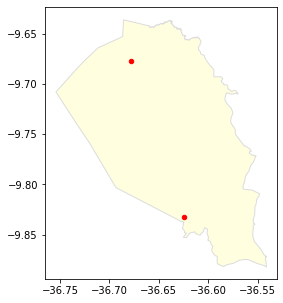

In [ ]:
# Defina um mapa com os limites municipais de Arapiraca e inclua as comunidades quilombolas 
aa = arapiraca_al.plot(figsize=(5,5), color='lightyellow', edgecolor='gainsboro', zorder=0)
qui_arapiraca.plot(color='red', markersize=20, ax=aa)

Concluído a análise de localização dos quilombos do município de Arapiraca.

#Sua vez
Isso parece complexo no início, mas você já aprendeu o suficiente para fazer análises importantes.